# Correlation Between Samples

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

## Get Data

In [15]:
from common.data import get_data
from common.paths import HEALTHY, WISC

X, Y, demographics, population = get_data(wisc_level=5, label_path=HEALTHY)
ages = demographics['Age']

print(f'X: {X.shape} | Y: {len(Y.keys())} | Age: {ages.shape} | Population: {population}')

X: (106, 34716) | Y: 6 | Age: (106,) | Population: healthy


In [16]:
from common.data import generate_fake_data

X, y = generate_fake_data(X, y)

print(f'X: {X.shape}')

X: (106, 34716)


In [17]:
from scipy import stats

correlations = []

for index, curr_subject in enumerate(X):
    for next_subject in X[index + 1:len(X) + 1]:
        correlations.append(stats.pearsonr(curr_subject, next_subject)[0])

print(f'Num correlations: {len(correlations)}')

Num correlations: 5565


Text(0.5, 1.0, 'Population=healthy, n=106, num_correlations=5565')

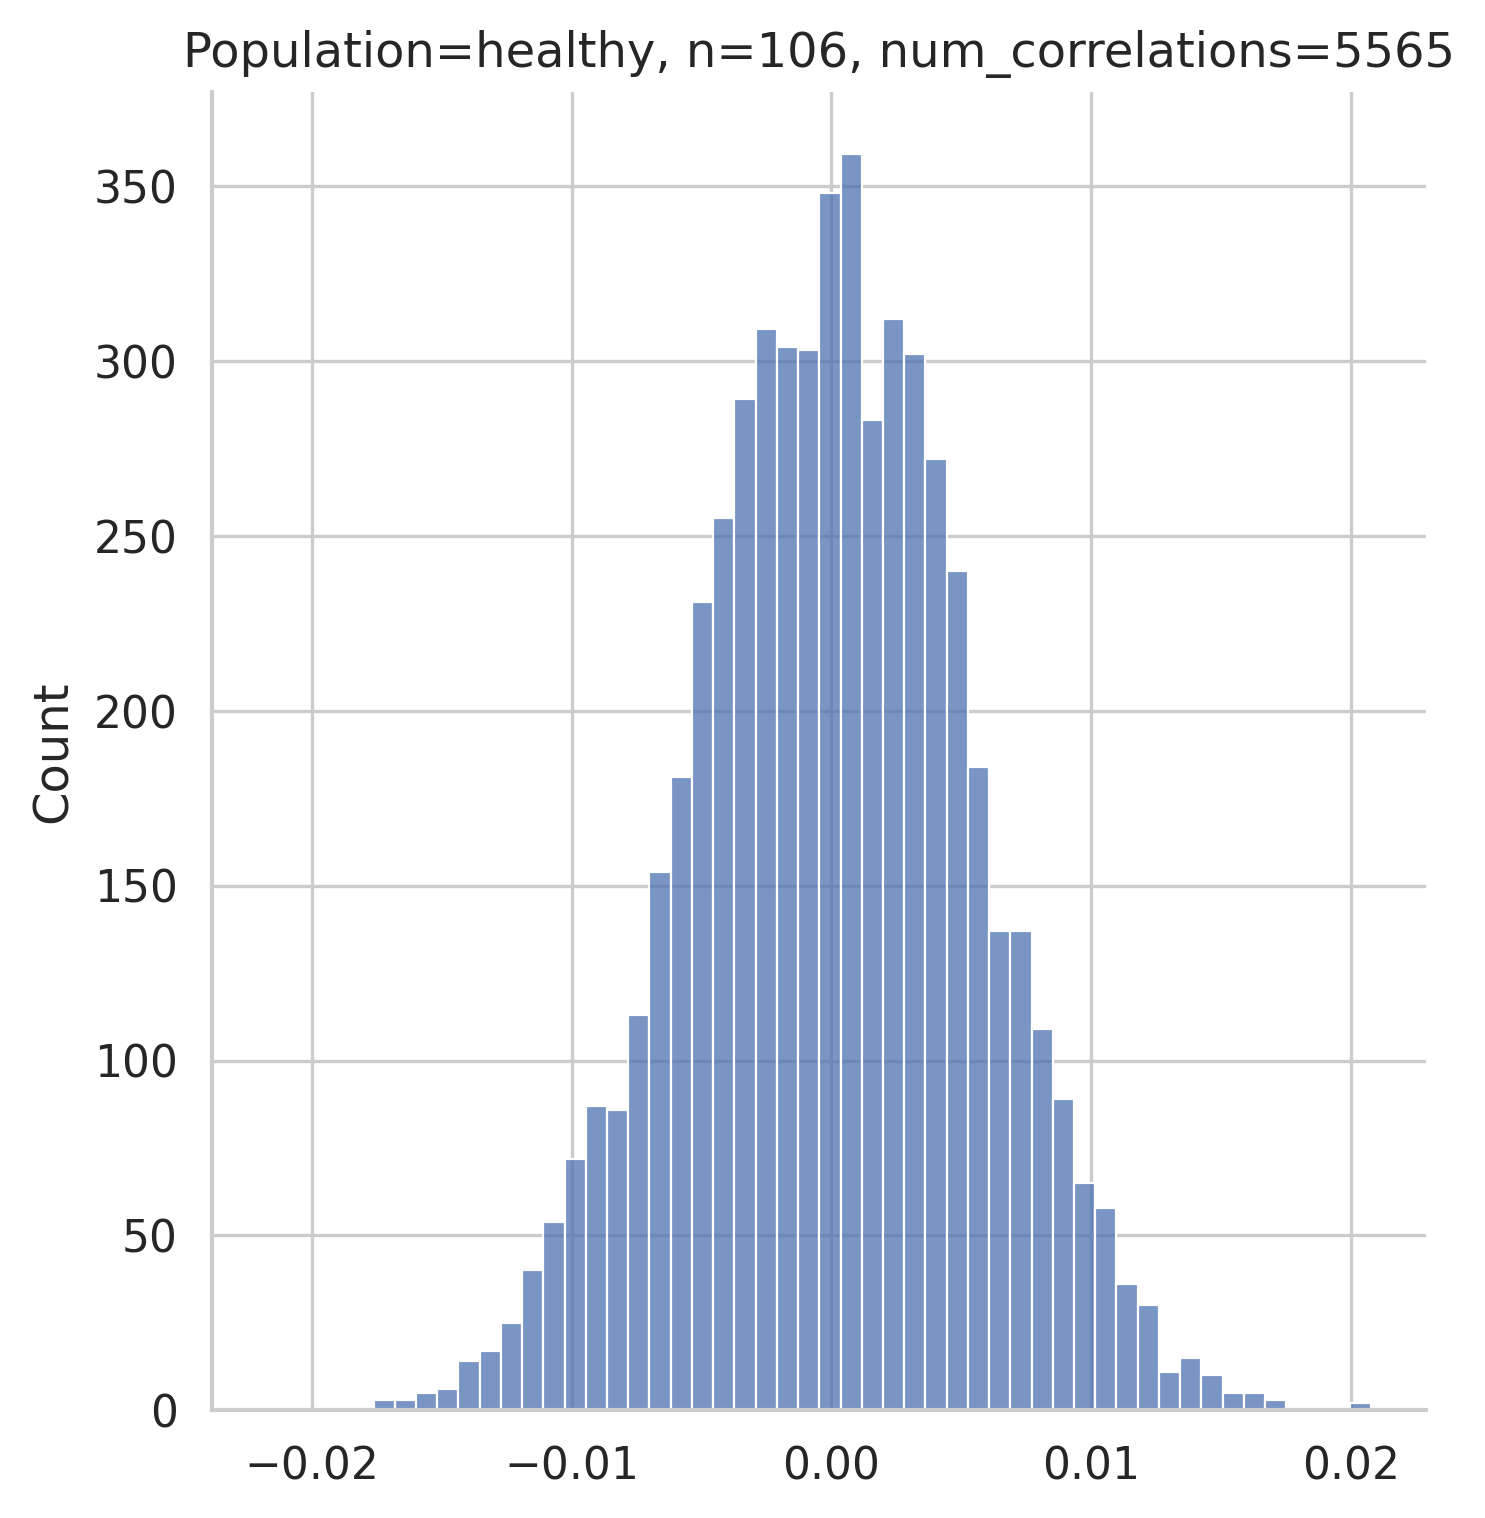

In [18]:
g = sns.displot(correlations)
g.ax.set_title(f'Population={population}, n={len(X)}, num_correlations={len(correlations)}')